# Yield Model Calculator for W2W hybrid bonding
#### Author: Zhichao Chen
#### Date: Apr 1, 2025

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from assembly_yield_calculator import Assembly_Yield_Calculator

TOPS: [1.6515072  2.10191825 2.24204614 1.23518402 0.98126688]
TOPS: [ 4.84465182  9.60876916 12.48523837 14.30539879 23.18267979]


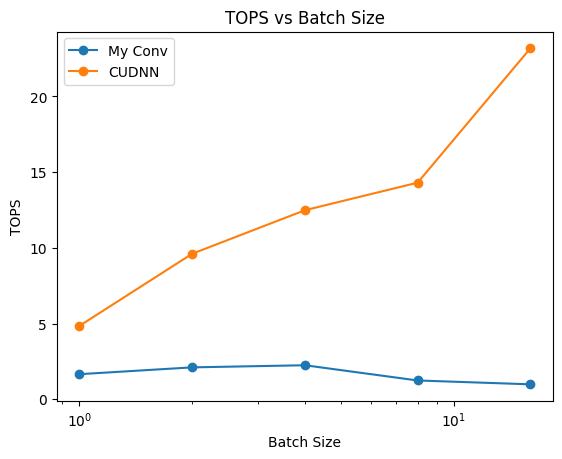

In [14]:
my_conv_time = np.array([0.56, 0.88, 1.65, 5.99, 15.08]) # in ms
cudnn_time = np.array([0.1909, 0.1925, 0.2963, 0.5172, 0.6383]) # in ms
batch_size = np.array([1.0, 2.0, 4.0, 8.0, 16.0])
OPS1 = 924844032 * 4
OPS2 = 924844032
my_TOPS = OPS2 / my_conv_time / 1e12 * 1e3 * batch_size
print('TOPS:', my_TOPS)
# Draw the plot, x-axis is batch size, uniform distribution
plt.plot(batch_size, my_TOPS, marker='o')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('TOPS')
plt.title('TOPS vs Batch Size')

cudnn_TOPS = OPS2 / cudnn_time / 1e12 * 1e3 * batch_size
print('TOPS:', cudnn_TOPS)
# Draw the plot, x-axis is batch size, uniform distribution
plt.plot(batch_size, cudnn_TOPS, marker='o')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('TOPS')
plt.title('TOPS vs Batch Size')
plt.legend(['My Conv', 'CUDNN'])
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 数据点
batch_sizes = [1, 2, 4, 8, 16]
implemented_kernel = [1.6515072,  2.10191825, 2.24204614, 1.23518402, 0.98126688]
MEM_BW = [17.79, 21.699, 23.600, 23.743, 23.804] # GB/s
roofline = [12.01, 12.84, 13.30, 13.55, 13.67]
cudnn = [4.84465182,  9.60876916, 12.48523837, 14.30539879, 23.18267979]

# 画图
plt.figure(figsize=(8, 5))
plt.plot(batch_sizes, implemented_kernel, 'o-', label='Implemented Kernel', color='royalblue')
plt.plot(batch_sizes, roofline, 'o-', label='Roofline', color='red')
plt.plot(batch_sizes, cudnn, 'o-', label='CuDNN', color='gold')

plt.title("Throughput vs. Batch Size for Conv1", fontsize=14)
plt.xlabel("batch size", fontsize=12)
plt.ylabel("TOPS", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

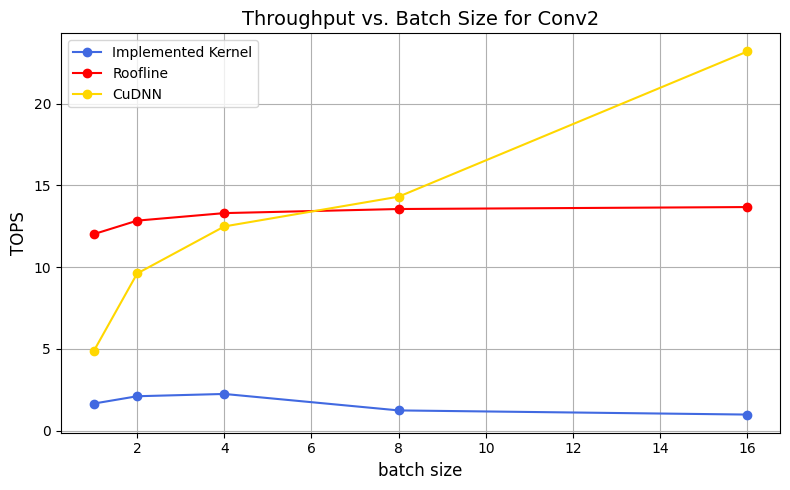

In [15]:
import matplotlib.pyplot as plt

# 数据点
batch_sizes = [1, 2, 4, 8, 16]
implemented_kernel = [1.6515072,  2.10191825, 2.24204614, 1.23518402, 0.98126688]
MEM_BW = [17.79, 21.699, 23.600, 23.743, 23.804] # GB/s
roofline = [12.01, 12.84, 13.30, 13.55, 13.67]
cudnn = [4.84465182,  9.60876916, 12.48523837, 14.30539879, 23.18267979]

# 画图
plt.figure(figsize=(8, 5))
plt.plot(batch_sizes, implemented_kernel, 'o-', label='Implemented Kernel', color='royalblue')
plt.plot(batch_sizes, roofline, 'o-', label='Roofline', color='red')
plt.plot(batch_sizes, cudnn, 'o-', label='CuDNN', color='gold')

plt.title("Throughput vs. Batch Size for Conv2", fontsize=14)
plt.xlabel("batch size", fontsize=12)
plt.ylabel("TOPS", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# WAFER PARAMETERS
PITCH = 6  # pitch (um)
DIE_W = 1e+4  # die width (um)
DIE_L = 1e+4  # die length (um)
WAF_R = 150e+3  # wafer radius (um)
PAD_TOP_R = 1.0  # top Cu pad radius (um)
PAD_BOT_R = 1.5  # bottom Cu pad radius (um)
PAD_ARR_ROW = int(np.floor(float(DIE_L / PITCH)))  # number of pads in a row of pad array
PAD_ARR_COL = int(np.floor(float(DIE_W / PITCH)))  # number of pads in a column of pad array
VOID_SHAPE = "circle"  # void shape: 'circle' or 'square'
dice_width = 10000 # dice width (um)

# Overlay Model Parameters
RANDOM_MISALIGNMENT_MEAN = 5e-3
RANDOM_MISALIGNMENT_STD = 1e-2
# Assume the systematic translation is normally distributed
SYSTEM_TRANSLATION_X_MEAN = 5e-3  # systematic translation mean (um) - x direction
SYSTEM_TRANSLATION_X_STD = 1e-2  # systematic translation standard deviation (um)  - x direction
SYSTEM_TRANSLATION_Y_MEAN = 5e-3  # systematic translation mean (um) - y direction
SYSTEM_TRANSLATION_Y_STD = 1e-2  # systematic translation standard deviation (um)  - y direction
# Assume the systematic rotation is normally distributed
SYSTEM_ROTATION_MEAN = 1e-7  # systematic rotation mean (rad)
SYSTEM_ROTATION_STD = 0.5e-7  # systematic rotation standard deviation (rad)
# Assume the bow difference is normally distributed
BOW_DIFFERENCE_MEAN = 10  # bow difference mean (um)
BOW_DIFFERENCE_STD = 3  # bow difference standard deviation (um)
# systematic magnification model: e = k_mag * bow_diff
k_mag = 0.09
M_0 = 0
SYSTEM_MAGNIFICATION_MEAN = (k_mag * BOW_DIFFERENCE_MEAN + M_0) / 1e6  # systematic magnification mean (ppm)
SYSTEM_MAGNIFICATION_STD = (k_mag * BOW_DIFFERENCE_STD) ** 2 / 1e6 # systematic magnification standard deviation (ppm)

# Defect Model Parameters
D0 = 1e-9  # Number of particles of all thicknesses per unit area (um^{-1})
z = 3  # Exponential factor of the particle thickness distribution
t_0 = 1  # The smallest particle thickness (um)
L_m = WAF_R  # Beyond this distance, no voids in the void tail
k_r = 1.8e-4
k_r0 = 230
k_L = 6.2e-2
k_n = 9e-5
k_S = 2.7
cluster_para = 0.1

# Cu expansion model parameters
# Cu pad dish mean and standard deviation at room temperature
TOP_DISH_MEAN = -10.0        # Top Cu pad dish mean (nm), negative value means the dish is concave
TOP_DISH_STD = 1.0          # Top Cu pad dish standard deviation (nm)
BOT_DISH_MEAN = -10.0        # Bottom Cu pad dish mean (nm), negative value means the dish is concave
BOT_DISH_STD = 1.0          # Bottom Cu pad dish standard deviation (nm)
# Expansion coefficient of Cu pad,      ΔH = k_e * ΔT
k_et = 0.052            # Top Cu pad expansion/temp coefficient (nm/K)
k_eb = 0.052            # Bottom Cu pad expansion/temp coefficient (nm/K)
T_R = 25                # Room temperature (°C)
T_anl = 300             # Annealing temperature (°C)

# Roughness model parameters
Asperity_R = 2e-6  # Asperity curvature radius (m)
Roughness_sigma = 1.0e-9  # Surface roughness standard deviation (m)
eta_s = 40e+12  # Asperity density (m^{-2})
Roughness_constant = 0.07
Adhesion_energy = 1.2  # Adhesion energy (J/m^2)
Young_modulus = 73e+9  # Young's modulus of dielectric material (Pa)
Dielectric_thickness = 1.5e-6  # Dielectric thickness (m)
DISH_0 = 75e-9  # Reference dish (m)
k_peel = 6.66e+15  # Peel force constant (N/m^4/K)

In [4]:
# WAFER PARAMETERS
WAF_R = 150e+3  # wafer radius (um)

VOID_SHAPE = "circle"  # void shape: 'circle' or 'square'
dice_width = 1000  # dice width (um)

num_points = 10

die_size_list = np.linspace(1e+4, 1e+4, num_points)
pitch_list = np.linspace(1, 1, num_points)
particle_density_list = np.logspace(-10, -8, num_points)
t_0_list = np.linspace(0.1, 0.1, num_points)
dish_std_list = np.linspace(1, 1, num_points)
translation_list = np.linspace(1e-2, 1e-2, num_points)
rotation_mean_list = np.logspace(-7, -7, num_points)
Roughness_sigma_list = np.linspace(1.0e-9, 1.0e-9, num_points)
PAD_BOT_R_ratio_list = np.linspace(0.5, 0.5, num_points)
PAD_TOP_R_ratio_list = np.linspace(2/3, 2/3, num_points)
bow_difference_mean_list = np.linspace(10, 10, num_points)
assembly_yield_list = []
overlay_yield_list = []
defect_yield_list = []
Cu_expansion_yield_list = []
roughness_yield_list = []
for i in range(len(particle_density_list)):
    print("Predicting yield for point ", i)
    DIE_W = die_size_list[i]  # die width (um)
    DIE_L = die_size_list[i]  # die length (um)
    PAD_ARR_ROW = int(np.floor(float(DIE_L / pitch_list[i])))  # number of pads in a row of pad array
    PAD_ARR_COL = int(np.floor(float(DIE_W / pitch_list[i])))  # number of pads in a column of pad array
    PAD_BOT_R = pitch_list[i] / 2 * PAD_BOT_R_ratio_list[i]  # bottom Cu pad radius (um)
    PAD_TOP_R = PAD_BOT_R * PAD_TOP_R_ratio_list[i]  # top Cu pad radius (um)
    assembly_yield, overlay_yield, defect_yield, Cu_expansion_yield = Assembly_Yield_Calculator(
        PITCH=pitch_list[i],
        DIE_W=DIE_W,
        DIE_L=DIE_L,
        WAF_R=WAF_R,
        PAD_TOP_R=PAD_TOP_R,
        PAD_BOT_R=PAD_BOT_R,
        PAD_ARR_ROW=PAD_ARR_ROW,
        PAD_ARR_COL=PAD_ARR_COL,
        VOID_SHAPE=VOID_SHAPE,
        dice_width=dice_width,
        SYSTEM_TRANSLATION_X_MEAN=translation_list[i],
        SYSTEM_TRANSLATION_X_STD=SYSTEM_TRANSLATION_X_STD,
        SYSTEM_TRANSLATION_Y_MEAN=translation_list[i],
        SYSTEM_TRANSLATION_Y_STD=SYSTEM_TRANSLATION_Y_STD,
        SYSTEM_ROTATION_MEAN=rotation_mean_list[i],
        SYSTEM_ROTATION_STD=SYSTEM_ROTATION_STD,
        BOW_DIFFERENCE_MEAN=bow_difference_mean_list[i],
        BOW_DIFFERENCE_STD=BOW_DIFFERENCE_STD,
        k_mag=k_mag,
        M_0=M_0,
        D0=particle_density_list[i],
        z=z,
        t_0=t_0_list[i],
        k_r=k_r,
        k_r0=k_r0,
        k_L=k_L,
        k_n=k_n,
        k_S=k_S,
        cluster_para=cluster_para,
        TOP_DISH_MEAN=TOP_DISH_MEAN,
        TOP_DISH_STD=dish_std_list[i],
        BOT_DISH_MEAN=BOT_DISH_MEAN,
        BOT_DISH_STD=dish_std_list[i],
        k_et=k_et,
        k_eb=k_eb,
        T_R=T_R,
        T_anl=T_anl,
        Asperity_R=Asperity_R,
        Roughness_sigma=Roughness_sigma_list[i],
        eta_s=eta_s,
        Roughness_constant=Roughness_constant,
        Adhesion_energy=Adhesion_energy,
        Young_modulus=Young_modulus,
        Dielectric_thickness=Dielectric_thickness,
        DISH_0=DISH_0,
        k_peel=k_peel        
    )
    assembly_yield_list.append(assembly_yield)
    overlay_yield_list.append(overlay_yield)
    defect_yield_list.append(defect_yield)
    Cu_expansion_yield_list.append(Cu_expansion_yield)
print("overlay_yield_list: ", overlay_yield_list)
print("defect_yield_list: ", defect_yield_list)
print("Cu_expansion_yield_list: ", Cu_expansion_yield_list)
print("assembly_yield_list: ", assembly_yield_list)

Predicting yield for point  0
The average number of defects per die is 0.012744773194203456.
Predicting yield for point  1
The average number of defects per die is 0.021259563011743653.
Predicting yield for point  2
The average number of defects per die is 0.03546308848052817.
Predicting yield for point  3
The average number of defects per die is 0.05915599694514216.
Predicting yield for point  4
The average number of defects per die is 0.09867815028279688.
Predicting yield for point  5
The average number of defects per die is 0.1646050754966413.
Predicting yield for point  6
The average number of defects per die is 0.2745778148618042.
Predicting yield for point  7
The average number of defects per die is 0.45802340047419304.
Predicting yield for point  8
The average number of defects per die is 0.7640290803812008.
Predicting yield for point  9
The average number of defects per die is 1.2744773194203458.
overlay_yield_list:  [0.9941022088468269, 0.9940331524156569, 0.9941011500668601, 

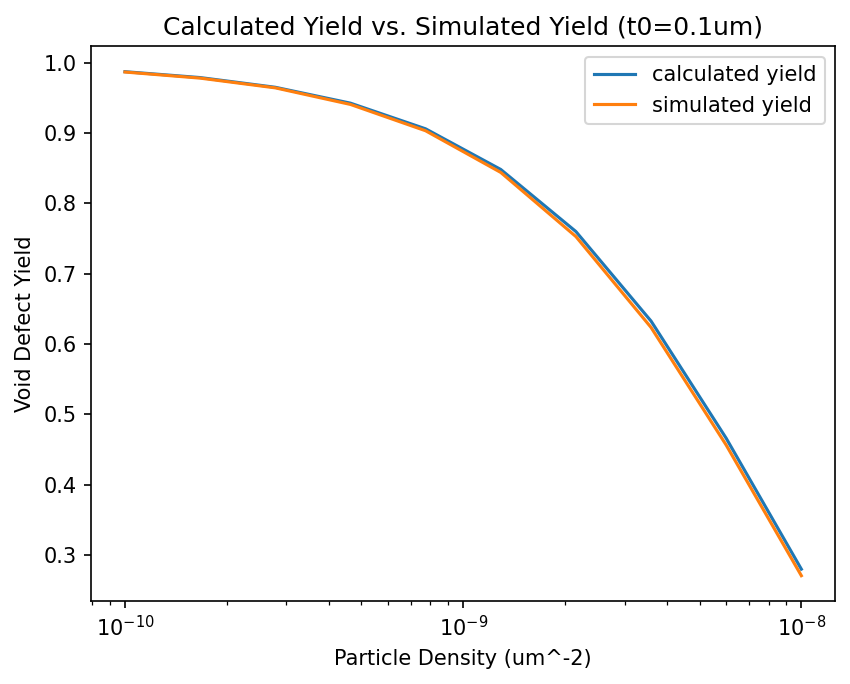

[[1.         0.99998085]
 [0.99998085 1.        ]]


In [5]:
particle_density_list = np.logspace(-10, -8, 10)
calculate_particle_yield = [0.9873360975035433, 0.9789648285294442, 0.9651583590340764, 0.9425597212507567, 0.9060342679747118, 0.8482286242176337, 0.7598928709894873, 0.632532674469655, 0.46578595221982755, 0.2795770595380717]
simulate_particle_yield = [0.9868592592592592,
 0.9781759259259258,
 0.964338888888889,
 0.9407444444444445,
 0.9032962962962964,
 0.8440148148148148,
 0.7527796296296296,
 0.6234574074074073,
 0.45607592592592594,
 0.27028148148148146]
calculate_particle_yield = np.array(calculate_particle_yield)
simulate_particle_yield = np.array(simulate_particle_yield)

# plot the calculated yield vs. the simulated yield
plt.figure(dpi=150)
plt.plot(particle_density_list, calculate_particle_yield, label='calculated yield')
plt.plot(particle_density_list, simulate_particle_yield, label='simulated yield')
plt.xscale('log')
plt.xlabel('Particle Density (um^-2)')
plt.ylabel('Void Defect Yield')
plt.title('Calculated Yield vs. Simulated Yield (t0=0.1um)')
plt.legend()
plt.show()

# Calculate the correlation between the calculated yield and the simulated yield
print(np.corrcoef(calculate_particle_yield, simulate_particle_yield))
